# Homework 2: Linear Regression

The is the coding potion of Homework 2. The homework is aimed at testing the ability to deal with a real-world dataset and use linear regression on it.

In [1]:
import numpy as np
import pandas as pd

# Plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

%matplotlib inline

/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


### Load Dataset
Loading the California Housing dataset using sklearn.

In [2]:
# Load dataset
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

## Part 1 : Analyse the dataset

In [3]:
# Put the dataset along with the target variable in a pandas dataframe
data = pd.DataFrame(housing.data, columns=housing.feature_names)
# Add target to data
data['target'] = housing['target']
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


### Part 1a : Check for missing values in the dataset

The dataset might have missing values represented by a `NaN`. Check if the dataset has such missing values.

In [4]:
# Check for missing values
def is_null(dataframe):
    """
    This function takes as input a pandas dataframe and outputs whether the
    dataframe has missing values. Missing values can be detected by checking
    for the presence of None or NaN. inf or -inf must also be treated as a missing value.

    Input:
        dataframe: Pandas dataframe
    Output:
        Return True is there are missing value in the dataframe. If not, return False.
    """
    if dataframe.isnull().values.any():
        return True
    if dataframe.isin([np.inf, -np.inf]).values.any():
        return True
    return False

In [5]:
# === DO NOT MOVE/DELETE ===
# This cell is used as a placeholder for autograder script injection.

# This dataset has no null values; you can run this cell as a sanity check.
print(f"The data has{'' if is_null(data) else ' no'} missing values.")
assert not is_null(data)

The data has no missing values.


### Part 1b: Studying the distribution of the target variable

Plot the histogram of the target variable over a fixed number of bins (say, 30).

Example histogram output:

![Target histogram](https://jeffcui.com/misc/target_histogram.png)

Hint: Use the histogram plotting function available in Seaborn in Matplotlib.

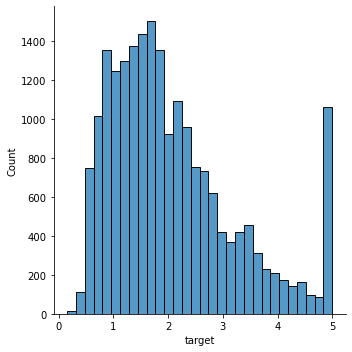

In [6]:
# Plot histogram of target variable

# YOUR CODE HERE
sns.displot(x="target",data=data,bins=30)

### Part 1c: Plotting the correlation matrix
Given the dataset stored in the `data` variable, plot the correlation matrix for the dataset. The dataset has 9 variables (8 features and one target variable) and thus, the correlation matrix must have a size of `9x9`.

Hint: You may use the correlation matrix computation of a dataset provided by the `pandas` library.

Link: [What is a correlation matrix?](https://www.displayr.com/what-is-a-correlation-matrix/)

<AxesSubplot:>

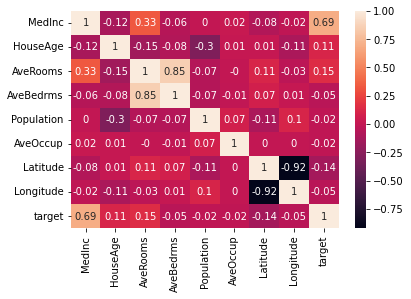

In [7]:
# Correlation matrix
def get_correlation_matrix(dataframe):
    """
    Given a pandas dataframe, obtain the correlation matrix
    computing the correlation between the entities in the dataset.

    Input:
        dataframe: Pandas dataframe
    Output:
        Return the correlation matrix as a pandas dataframe, rounded off to 2 decimal places.
    """
    # YOUR CODE HERE
    return dataframe.corr().round(2)
# Plot the correlation matrix
correlation_matrix = get_correlation_matrix(data)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)

In [8]:
# === DO NOT MOVE/DELETE ===
# This cell is used as a placeholder for autograder script injection.

# You can check your output against the expected correlation matrix below:
ground_truth = np.array([
    [1.0, -0.12, 0.33, -0.06, 0.0, 0.02, -0.08, -0.02, 0.69],
    [-0.12, 1.0, -0.15, -0.08, -0.3, 0.01, 0.01, -0.11, 0.11],
    [0.33, -0.15, 1.0, 0.85, -0.07, 0.0, 0.11, -0.03, 0.15],
    [-0.06, -0.08, 0.85, 1.0, -0.07, -0.01, 0.07, 0.01, -0.05],
    [0.0, -0.3, -0.07, -0.07, 1.0, 0.07, -0.11, 0.1, -0.02],
    [0.02, 0.01, 0.0, -0.01, 0.07, 1.0, 0.0, 0.0, -0.02],
    [-0.08, 0.01, 0.11, 0.07, -0.11, 0.0, 1.0, -0.92, -0.14],
    [-0.02, -0.11, -0.03, 0.01, 0.1, 0.0, -0.92, 1.0, -0.05],
    [0.69, 0.11, 0.15, -0.05, -0.02, -0.02, -0.14, -0.05, 1.0],
])
assert np.allclose(ground_truth, get_correlation_matrix(data).to_numpy(), rtol=1e-2, atol=1e-2)

### Part 1d: Extracting relevant variables

Based on the correlation matrix obtained in the previous part, identify the top-4 most relevant features from the dataset for predicting the target variable.

In [9]:
correlation_matrix['target'].abs().sort_values()[-5:-1].index

Index(['HouseAge', 'Latitude', 'AveRooms', 'MedInc'], dtype='object')

## Part 2: Data Manipulation

This section is focused on arranging the dataset in a format suitable for training the linear regression model.

### Part 2a: Normalize the dataset

Find the mean and standard deviation corresponding to each feature and target variable in the dataset. Use the values of the mean and standard deviation to normalize the dataset.

In [10]:
features = np.concatenate([data[name].to_numpy()[:, None] for name in housing['feature_names']], axis=1)
target = housing['target']

# Normalize data
def normalize(features, target):
    # YOUR CODE HERE
    def standardization(data):
        mu = np.mean(data, axis=0)
        sigma = np.std(data, axis=0)
        return (data - mu) / sigma
    return standardization(features), standardization(target)
features_normalized, target_normalized = normalize(features, target)

In [11]:
# === DO NOT MOVE/DELETE ===
# This cell is used as a placeholder for autograder script injection.
assert all(np.abs(features_normalized.mean(axis=0)) < 1e-2), "Mean should be close to 0"
assert all(np.abs(features_normalized.std(axis=0) - 1) < 1e-2), "Standard deviation should be close to 1"
assert np.abs(target_normalized.mean(axis=0)) < 1e-2, "Mean should be close to 0"
assert np.abs(target_normalized.std(axis=0) - 1) < 1e-2, "Standard deviation should be close to 1"

### Part 2b: Train-Test Split

Use the train-test split function from `sklearn` and execute a 80-20 train-test split of the dataset.

In [12]:
# YOUR CODE HERE
X_train,X_test = train_test_split(features_normalized, test_size=0.2, random_state=0)
Y_train,Y_test = train_test_split(target_normalized, test_size=0.2, random_state=0)

In [13]:
# === DO NOT MOVE/DELETE ===
# This cell is used as a placeholder for autograder script injection.

# Sanity checking:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(16512, 8)
(4128, 8)
(16512,)
(4128,)


## Part 3: Linear Regression

In this part, a linear regression model is used to fit the dataset loaded and normalized above.

### Part 3a: Code for Linear Regression
Implement a closed-form solution for ordinary least squares linear regression in `MyLinearRegression`, and print out the RMSE and $R^2$ between the ground truth and the model prediction.

In [14]:
class MyLinearRegression:
    def __init__(self):
        self.theta = None
    
    def fit(self, X, Y):
        # Given X and Y, compute theta using the closed-form solution for linear regression.
        # YOUR CODE HERE
        self.theta=np.dot(np.linalg.inv(np.dot(X.T, X)), np.dot(X.T, Y))
    
    def predict(self, X):
        # Predict Y for a given X
        # YOUR CODE HERE
       
        return np.dot(X,self.theta)

In [15]:
# Train the model on (X_train, Y_train) using Linear Regression 
my_model = MyLinearRegression()
my_model.fit(X_train, Y_train)

In [16]:
from sklearn.metrics import mean_squared_error, r2_score

# Compute train RMSE using (X_train, Y_train)
y_train_predict = my_model.predict(X_train)
train_rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
train_r2 = r2_score(Y_train, y_train_predict)
print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(train_rmse))
print('R2 score is {}'.format(train_r2))
print("\n")

# Compute test RMSE using (X_test, Y_test)
y_test_predict = my_model.predict(X_test)
test_rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
test_r2 = r2_score(Y_test, y_test_predict)
print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(test_rmse))
print('R2 score is {}'.format(test_r2))

The model performance for training set
--------------------------------------
RMSE is 0.6269848126925497
R2 score is 0.608893585337847


The model performance for testing set
--------------------------------------
RMSE is 0.6302717773501297
R2 score is 0.5943507042437144


### Part 3b: Compare with LinearRegression from sklearn.linear_model

Use LinearRegression from the `sklearn` package to fit the dataset and compare the results obtained with your own implementaion of Linear Regression.

The linear regressor should be named `model` for the cells below to run properly.

In [17]:
# YOUR CODE HERE
from sklearn.linear_model import LinearRegression
model=LinearRegression().fit(X_train,Y_train)

In [18]:
# model evaluation for training set
y_train_predict = model.predict(X_train)
sklearn_train_rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
sklearn_train_r2 = r2_score(Y_train, y_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(sklearn_train_rmse))
print('R2 score is {}'.format(sklearn_train_r2))
print("\n")

# model evaluation for testing set
y_test_predict = model.predict(X_test)
sklearn_test_rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
sklearn_test_r2 = r2_score(Y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(sklearn_test_rmse))
print('R2 score is {}'.format(sklearn_test_r2))

The model performance for training set
--------------------------------------
RMSE is 0.626982226453801
R2 score is 0.6088968118672872


The model performance for testing set
--------------------------------------
RMSE is 0.6302930934638351
R2 score is 0.5943232652466204


### Part 3c: Analysis Linear Regression Performance

In this section, provide the observed difference in performance along with an explanation of the following:
- Difference between training between unnormalized and normalized data.
- Difference between training on all features versus training on the top-5 most relevant features in the dataset.
- Difference between (1) training on all features (unnormalized), (2) training on top-4 unnormalized features, and (3) training on top-4 normalized features.

Write your answer below.

YOUR ANSWER HERE

#### Difference between training between unnormalized and normalized data.

In [19]:
features = np.concatenate([data[name].to_numpy()[:, None] for name in housing['feature_names']], axis=1)
target=housing['target']
X_train,X_test = train_test_split(features, test_size=0.2, random_state=0)
Y_train,Y_test = train_test_split(target, test_size=0.2, random_state=0)
model=LinearRegression().fit(X_train,Y_train)
# model evaluation for unnormalized training set
y_train_predict = model.predict(X_train)
sklearn_train_rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
sklearn_train_r2 = r2_score(Y_train, y_train_predict)

print("The model performance for unnormalized training set")
print("--------------------------------------")
print('RMSE is {}'.format(sklearn_train_rmse))
print('R2 score is {}'.format(sklearn_train_r2))
print("\n")
# model evaluation for unnomarlized testing set
y_test_predict = model.predict(X_test)
sklearn_test_rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
sklearn_test_r2 = r2_score(Y_test, y_test_predict)

print("The model performance for unormalized testing set")
print("--------------------------------------")
print('RMSE is {}'.format(sklearn_test_rmse))
print('R2 score is {}'.format(sklearn_test_r2))

The model performance for unnormalized training set
--------------------------------------
RMSE is 0.7234924745376035
R2 score is 0.6088968118672871


The model performance for unormalized testing set
--------------------------------------
RMSE is 0.7273129773603133
R2 score is 0.5943232652466182


In [20]:
X_train,X_test = train_test_split(features_normalized, test_size=0.2, random_state=0)
Y_train,Y_test = train_test_split(target_normalized, test_size=0.2, random_state=0)
model=LinearRegression().fit(X_train,Y_train)
# model evaluation for normalzied training set
y_train_predict = model.predict(X_train)
sklearn_train_rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
sklearn_train_r2 = r2_score(Y_train, y_train_predict)

print("The model performance for normalized training set")
print("--------------------------------------")
print('RMSE is {}'.format(sklearn_train_rmse))
print('R2 score is {}'.format(sklearn_train_r2))
print("\n")

# model evaluation for normalzied testing set
y_test_predict = model.predict(X_test)
sklearn_test_rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
sklearn_test_r2 = r2_score(Y_test, y_test_predict)

print("The model performance for normalized testing set")
print("--------------------------------------")
print('RMSE is {}'.format(sklearn_test_rmse))
print('R2 score is {}'.format(sklearn_test_r2))

The model performance for normalized training set
--------------------------------------
RMSE is 0.626982226453801
R2 score is 0.6088968118672872


The model performance for normalized testing set
--------------------------------------
RMSE is 0.6302930934638351
R2 score is 0.5943232652466204


As we could see above, RMSE of normlaized data is lower than the unnormalized, but the diffenrence of their R2 score is minature. RMSE tells us the typical distance between the predicted value made by the regression model and the actual value. The normalzied model decreases RMSE by decreasing mean and then divided by standard deviation. However, it does not change the performance of prediction, so the two model tell us the same how well the predictor variables can explain the variation in the response variable. 


#### Difference between training on all features versus training on the top-5 most relevant features in the dataset. Here, I assume all features normalized.

In [21]:
correlation_matrix['target'].abs().sort_values(ascending=False)[1:6].index

Index(['MedInc', 'AveRooms', 'Latitude', 'HouseAge', 'AveBedrms'], dtype='object')

In [22]:
features_2 = np.concatenate([data[name].to_numpy()[:, None] for name in ['MedInc', 'AveRooms', 'Latitude', 'HouseAge', 'AveBedrms']], axis=1)
target_2=housing['target']
features_2_normalized, target_2_normalized = normalize(features_2, target_2)
X_train,X_test = train_test_split(features_2_normalized, test_size=0.2, random_state=0)
Y_train,Y_test = train_test_split(target_2_normalized, test_size=0.2, random_state=0)
model=LinearRegression().fit(X_train,Y_train)
# model evaluation for top5 training set
y_train_predict = model.predict(X_train)
sklearn_train_rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
sklearn_train_r2 = r2_score(Y_train, y_train_predict)

print("The model performance for top5 training set")
print("--------------------------------------")
print('RMSE is {}'.format(sklearn_train_rmse))
print('R2 score is {}'.format(sklearn_train_r2))
print("\n")
# model evaluation for top5 testing set
y_test_predict = model.predict(X_test)
sklearn_test_rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
sklearn_test_r2 = r2_score(Y_test, y_test_predict)

print("The model performance for top 5 testing set")
print("--------------------------------------")
print('RMSE is {}'.format(sklearn_test_rmse))
print('R2 score is {}'.format(sklearn_test_r2))

The model performance for top5 training set
--------------------------------------
RMSE is 0.676453671848535
R2 score is 0.5447426000366291


The model performance for top 5 testing set
--------------------------------------
RMSE is 0.682800809215843
R2 score is 0.5239165771733547



The training on all features is discuessed in Case1
- For normalized all features, the RMSE and R2 score is:
    - For training:
      - RMSE is 0.626982226453801
      - R2 score is 0.6088968118672872
  - For testing:
    - RMSE is 0.6302930934638351
    - R2 score is 0.5943232652466204
    
As we could see above, normalzied data on all features have lower RMSE and higher R2 score than the top-5 most relevant model in general. This implies that all-feature model fits the data better than the other model. The reason might be all features contain more correlated variables than only top-5 features. Even though the top-5 have higher correlation, the rest features could still tell something about the target value. Therefore, they have better prediction performance for they have more dependent variables to the target.
    

#### Difference between (1) training on all features (unnormalized), (2) training on top-4 unnormalized features, and (3) training on top-4 normalized features.


In [23]:
correlation_matrix['target'].abs().sort_values(ascending=False)[1:5].index

Index(['MedInc', 'AveRooms', 'Latitude', 'HouseAge'], dtype='object')

In [24]:
features_3 = np.concatenate([data[name].to_numpy()[:, None] for name in ['MedInc', 'AveRooms', 'Latitude', 'HouseAge']], axis=1)
target_3=housing['target']
X_train,X_test = train_test_split(features_3, test_size=0.2, random_state=0)
Y_train,Y_test = train_test_split(target_3, test_size=0.2, random_state=0)
model=LinearRegression().fit(X_train,Y_train)
# model evaluation for top4 unnormalzied training set
y_train_predict = model.predict(X_train)
sklearn_train_rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
sklearn_train_r2 = r2_score(Y_train, y_train_predict)

print("The model performance for top4 unnormalzied training set")
print("--------------------------------------")
print('RMSE is {}'.format(sklearn_train_rmse))
print('R2 score is {}'.format(sklearn_train_r2))
print("\n")
# model evaluation for top4 unnormalzied testing set
y_test_predict = model.predict(X_test)
sklearn_test_rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
sklearn_test_r2 = r2_score(Y_test, y_test_predict)

print("The model performance for top4 unnormalzied testing set")
print("--------------------------------------")
print('RMSE is {}'.format(sklearn_test_rmse))
print('R2 score is {}'.format(sklearn_test_r2))

The model performance for top4 unnormalzied training set
--------------------------------------
RMSE is 0.797715555733549
R2 score is 0.5245340268610577


The model performance for top4 unnormalzied testing set
--------------------------------------
RMSE is 0.8107329651556172
R2 score is 0.4959273977779419


In [25]:
features_3_normalized, target_3_normalized = normalize(features_3, target_3)
X_train,X_test = train_test_split(features_3_normalized, test_size=0.2, random_state=0)
Y_train,Y_test = train_test_split(target_3_normalized, test_size=0.2, random_state=0)
model=LinearRegression().fit(X_train,Y_train)
# model evaluation for top4 normalzied training set
y_train_predict = model.predict(X_train)
sklearn_train_rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
sklearn_train_r2 = r2_score(Y_train, y_train_predict)

print("The model performance for top4 normalzied training set")
print("--------------------------------------")
print('RMSE is {}'.format(sklearn_train_rmse))
print('R2 score is {}'.format(sklearn_train_r2))
print("\n")
# model evaluation for top4 normalzied testing set
y_test_predict = model.predict(X_test)
sklearn_test_rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
sklearn_test_r2 = r2_score(Y_test, y_test_predict)

print("The model performance for top4 normalzied testing set")
print("--------------------------------------")
print('RMSE is {}'.format(sklearn_test_rmse))
print('R2 score is {}'.format(sklearn_test_r2))

The model performance for top4 normalzied training set
--------------------------------------
RMSE is 0.69130432286847
R2 score is 0.5245340268610579


The model performance for top4 normalzied testing set
--------------------------------------
RMSE is 0.7025852755104797
R2 score is 0.4959273977779418


As we have discussed in case 1,
For unnormalized all features, the RMSE and R2 score is:
   - For training:
        - RMSE is 0.7234924745376035
        - R2 score is 0.6088968118672871
  - For testing:
       - RMSE is 0.7273129773603133
    - R2 score is 0.5943232652466182
    
    



As we could see from the above, the RMSE of top4 unnormalized > all-feature unnormalized > top4 normalized, while the R2 score of all-feature unnormalized > top4 unnormalized ≈ top4 normalized. The difference of normalized and unnormalized on top-4 feature is explained in case 1. Normalizing top-4 feature could make the data cleaner and increase training stability by decreasing distance between the predicted value and the actual value. However, all-feature still has higher R2 score, indicating that it tells us how well a model can predict the value of the response variable in percentage terms. 